In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv("Avocado.csv")
subset_df = df.sample(frac=0.1, random_state=42)

In [25]:
subset_df

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
18988,2018-05-06,1.762750,20143.58,430.84,2436.25,0.00,7870.78,0.00,0.00,0.00,organic,Detroit
41018,2021-11-28,1.624900,1540492.33,65280.17,85003.19,212.79,940298.46,859897.67,9932.50,0.00,organic,TotalUS
4969,2015-11-22,1.940000,858.83,13.84,84.18,0.00,760.81,755.69,5.12,0.00,organic,Albany
42183,2022-02-06,1.118273,4981929.24,2527095.16,796196.77,60784.30,1596537.39,NaN,NaN,NaN,conventional,SouthCentral
50529,2023-06-18,1.679652,29881.25,224.87,2563.94,0.00,18010.47,NaN,NaN,NaN,organic,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...
27174,2019-09-01,1.821814,7436.97,1519.75,10.08,0.00,5100.23,0.00,0.00,0.00,organic,Pittsburgh
10474,2016-11-06,2.010000,8433.01,1281.15,5281.54,8.56,1861.76,1804.65,57.11,0.00,organic,WestTexNewMexico
15759,2017-10-15,1.580000,25031589.09,8769357.86,8534404.17,392119.12,7335707.94,5387869.35,1893510.99,54327.60,conventional,TotalUS
7779,2016-05-22,1.190000,837573.29,60638.26,540988.18,19544.87,216401.98,211306.25,2950.73,2145.00,conventional,BaltimoreWashington


In [26]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5342 entries, 18988 to 2084
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5342 non-null   object 
 1   AveragePrice  5342 non-null   float64
 2   TotalVolume   5342 non-null   float64
 3   plu4046       5342 non-null   float64
 4   plu4225       5342 non-null   float64
 5   plu4770       5342 non-null   float64
 6   TotalBags     5342 non-null   float64
 7   SmallBags     4120 non-null   float64
 8   LargeBags     4120 non-null   float64
 9   XLargeBags    4120 non-null   float64
 10  type          5342 non-null   object 
 11  region        5342 non-null   object 
dtypes: float64(9), object(3)
memory usage: 542.5+ KB


In [27]:
subset_df.describe()

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,5342.000000,5.342000e+03,5.342000e+03,5.342000e+03,5.342000e+03,5.342000e+03,4.120000e+03,4.120000e+03,4120.000000
mean,1.430228,8.468992e+05,2.817232e+05,2.164001e+05,1.942504e+04,2.135838e+05,1.099150e+05,2.450130e+04,2682.866209
std,0.389121,3.391368e+06,1.207075e+06,9.125916e+05,1.000995e+05,8.385580e+05,5.889807e+05,1.520649e+05,21482.782356
min,0.490000,7.162900e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.120989,1.575159e+04,6.202375e+02,2.058310e+03,0.000000e+00,7.201290e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.404336,1.176053e+05,1.329648e+04,1.727914e+04,8.112000e+01,3.662938e+04,5.565900e+02,0.000000e+00,0.000000
75%,1.693149,4.470328e+05,1.270762e+05,9.067320e+04,3.545040e+03,1.144824e+05,4.086415e+04,3.009528e+03,0.000000
max,2.830000,4.337163e+07,1.900034e+07,1.424560e+07,2.216153e+06,1.294235e+07,1.031088e+07,3.202254e+06,677334.990000


In [28]:
faltantes=subset_df.isnull().sum()
faltantes

Date               0
AveragePrice       0
TotalVolume        0
plu4046            0
plu4225            0
plu4770            0
TotalBags          0
SmallBags       1222
LargeBags       1222
XLargeBags      1222
type               0
region             0
dtype: int64

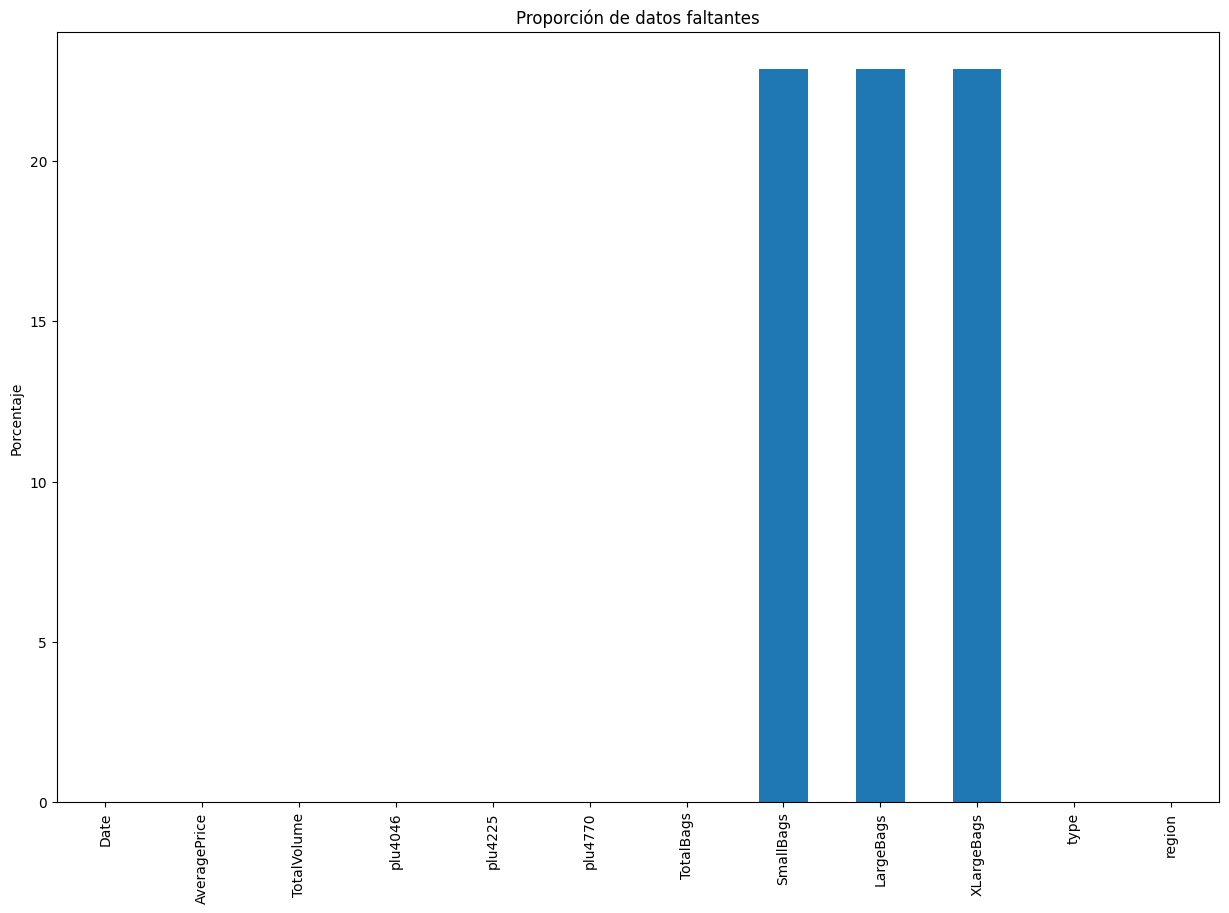

In [29]:
# Proporción de datos faltantes
faltantes = subset_df.isnull().mean() * 100

# Gráfico de datos faltantes
plt.figure(figsize=(15, 10))
faltantes.plot(kind='bar')
plt.title('Proporción de datos faltantes')
plt.ylabel('Porcentaje')
plt.show()

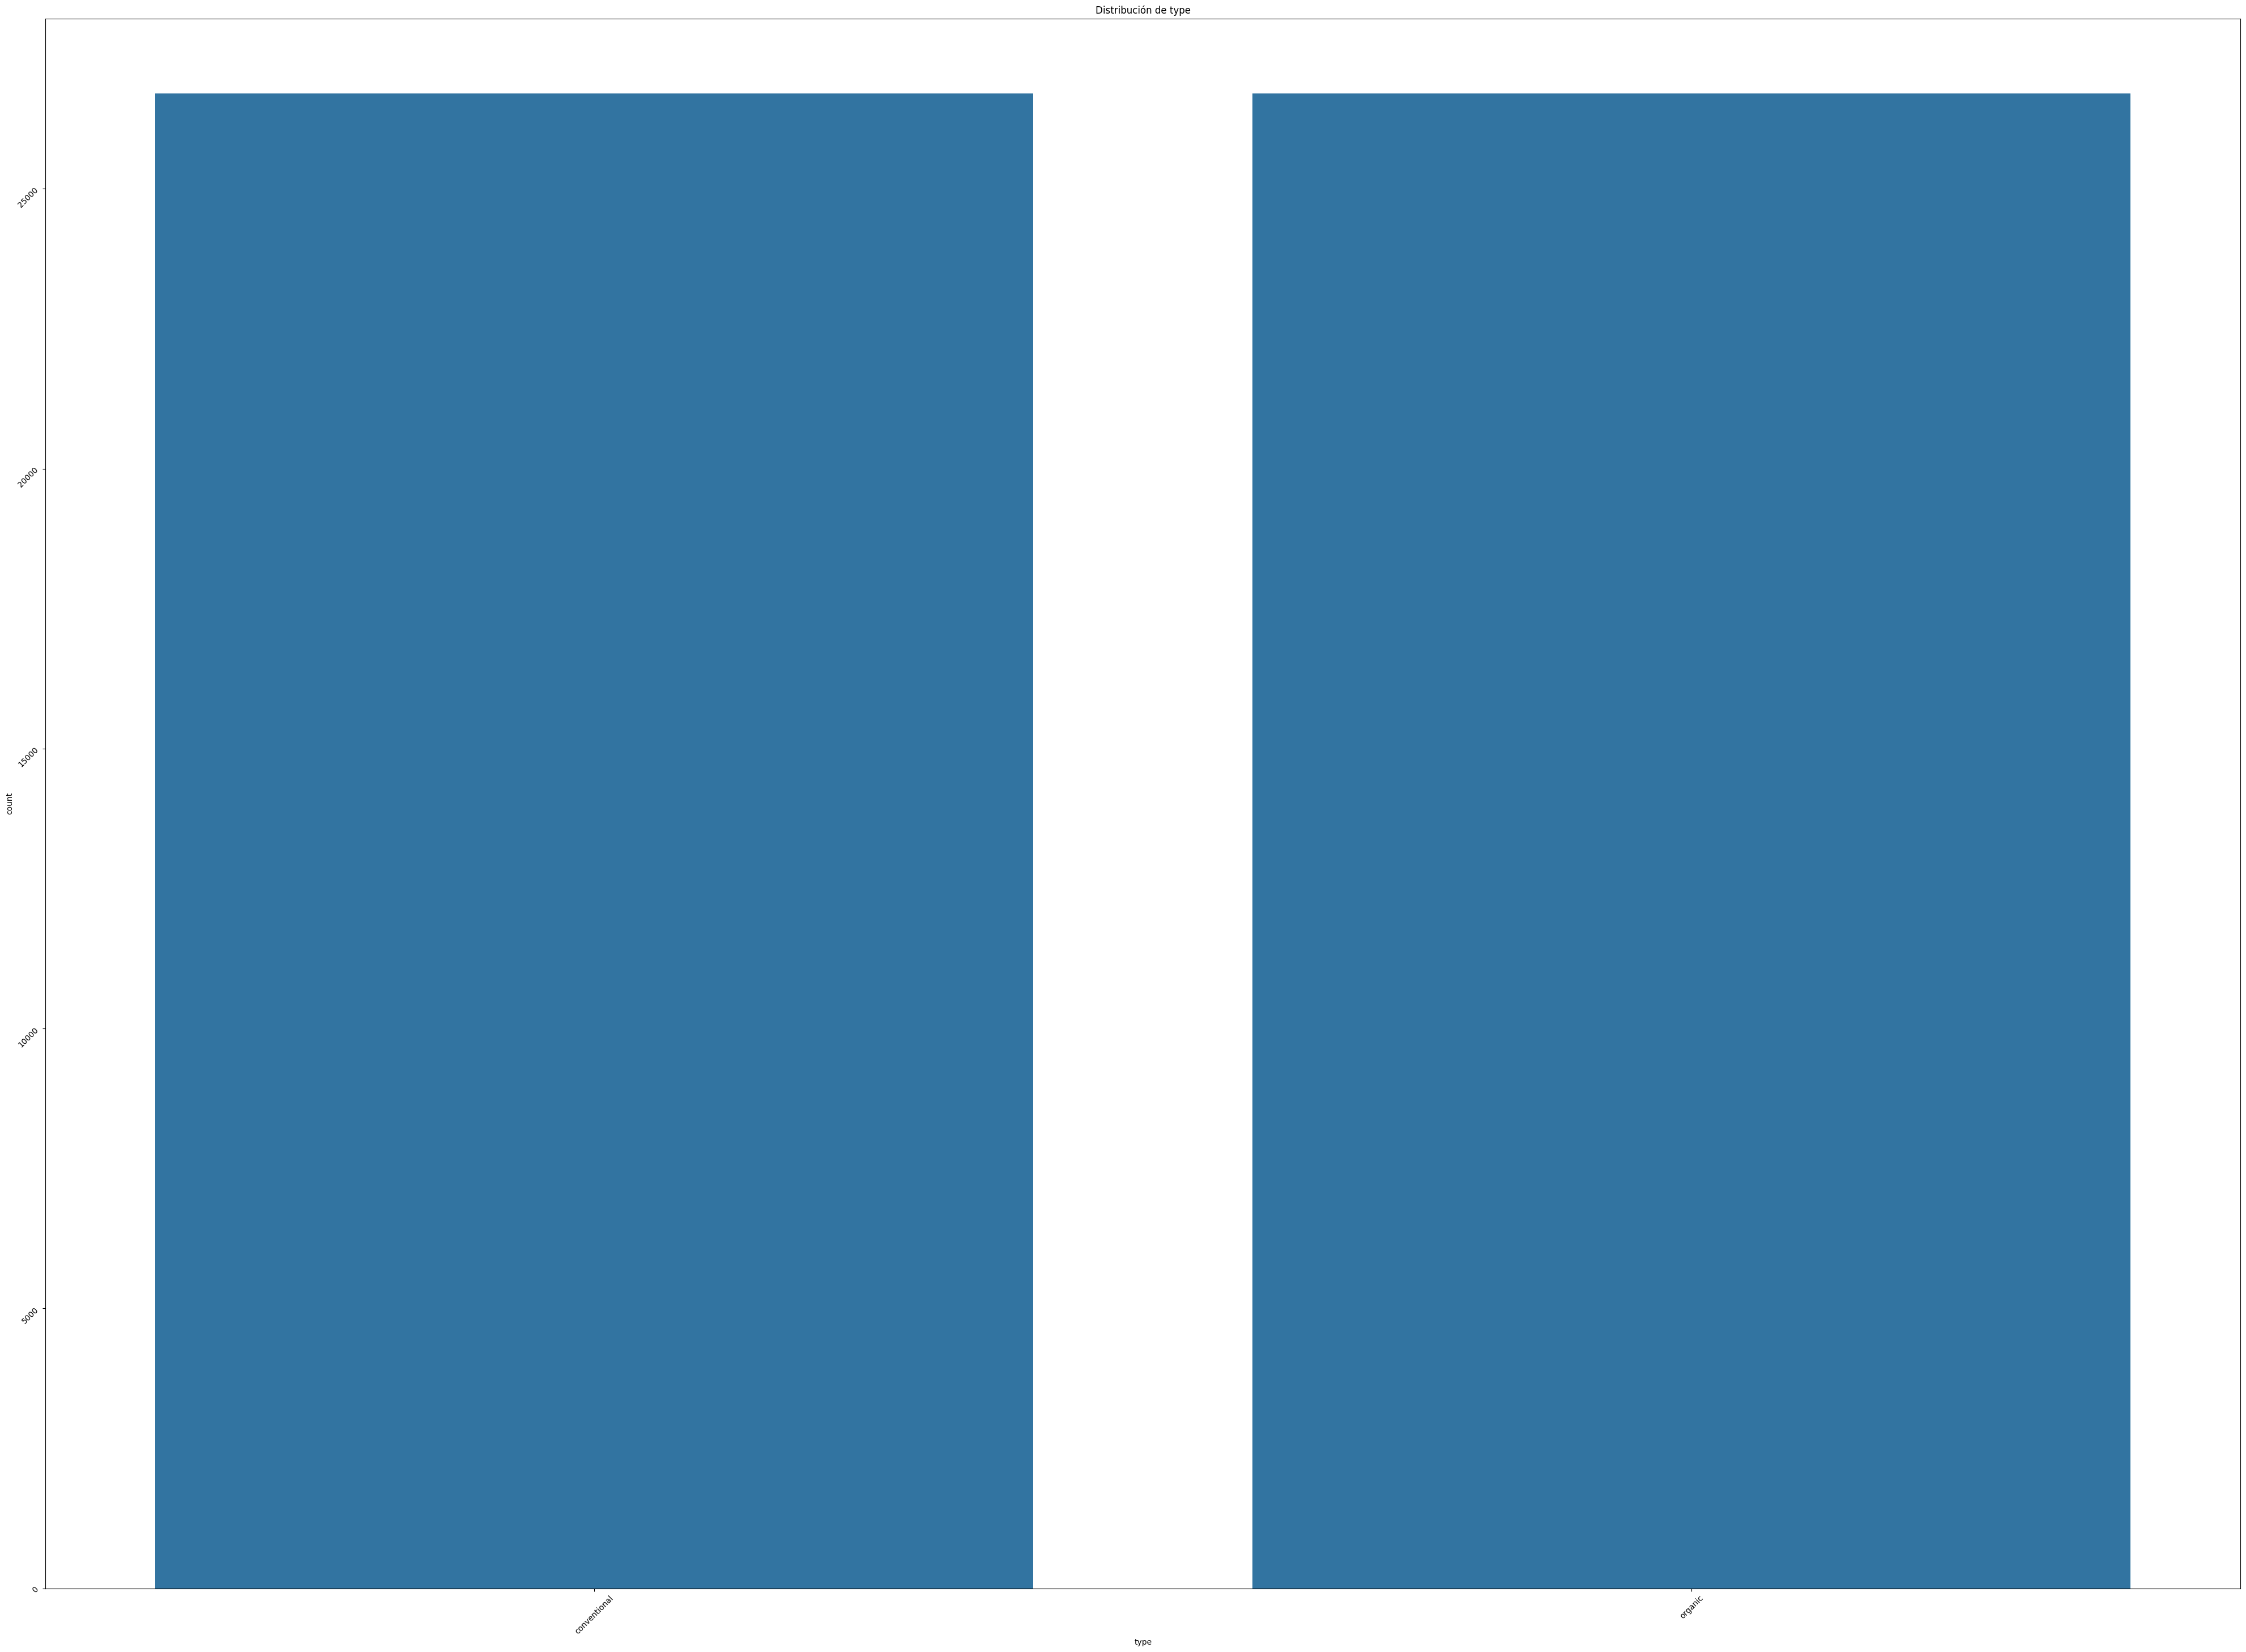

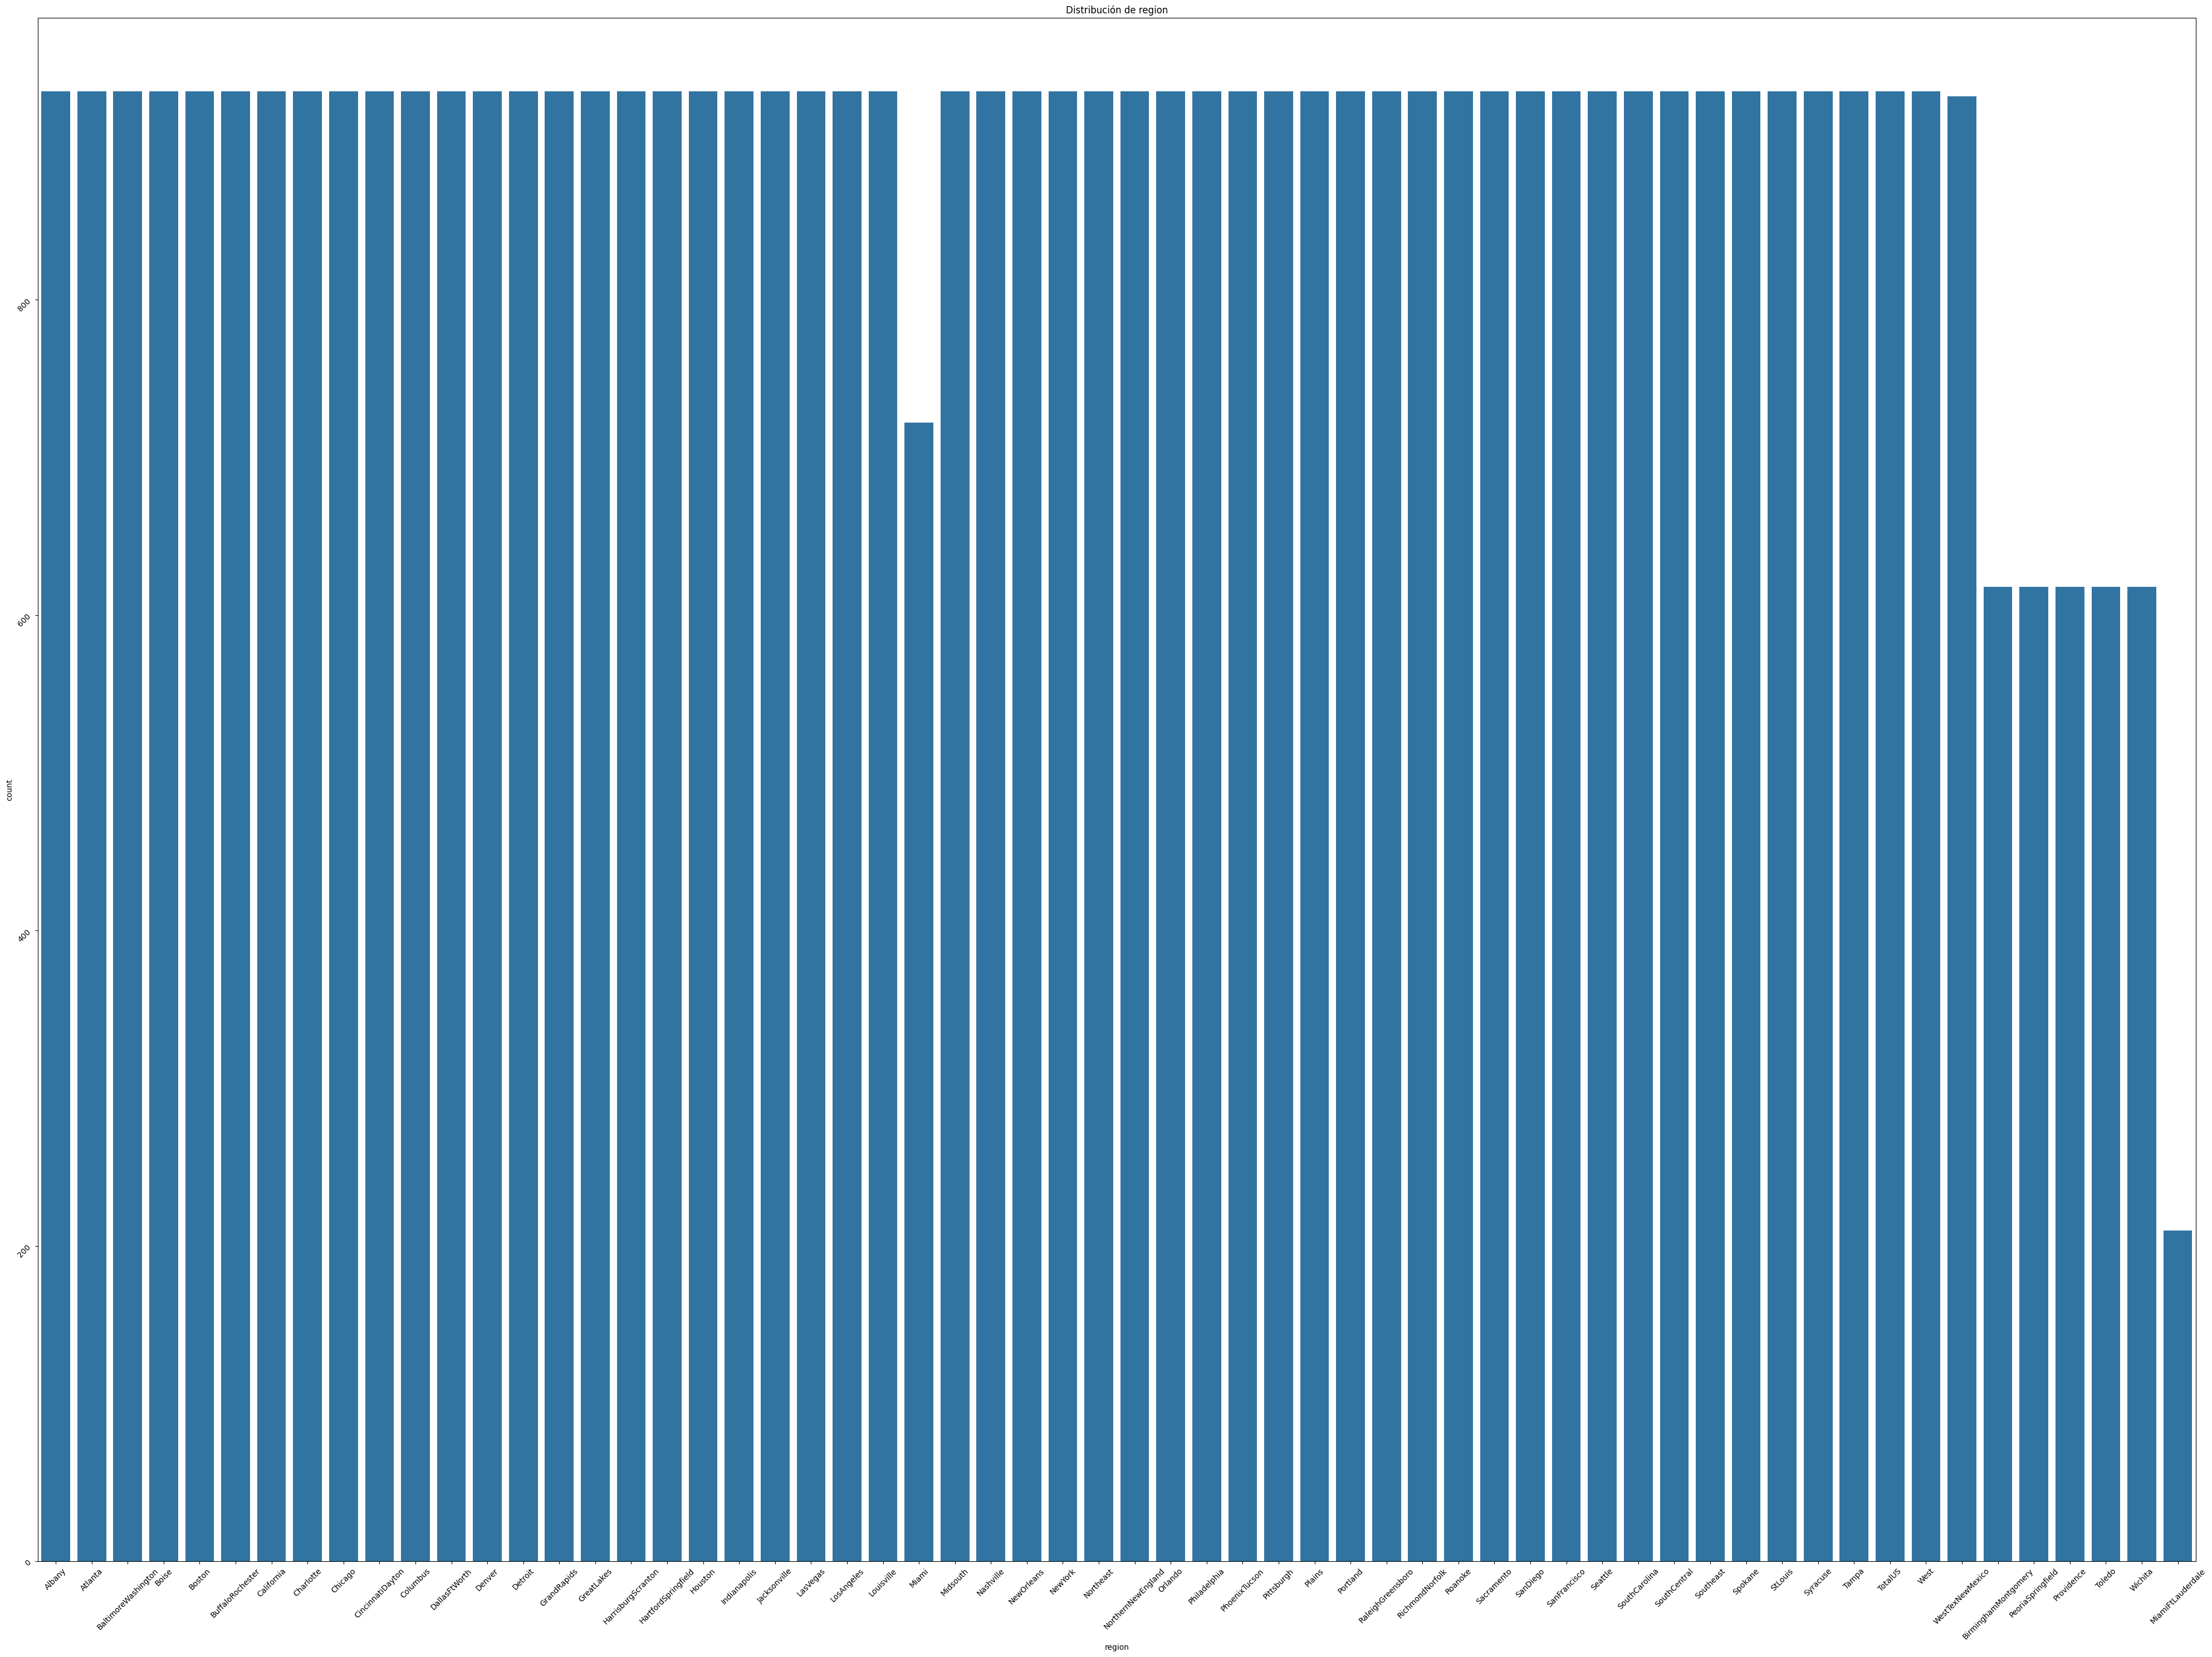

In [30]:
# Gráfico de barras
var_categoricas=["type","region"]
for var in var_categoricas:
    plt.figure(figsize=(50, 36))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribución de {var}')
    
    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45)  # You can change the angle as needed
    
    # Rotate y-axis labels (optional)
    plt.yticks(rotation=45)  # You can adjust the angle if you want
    
    plt.show()

C:\Users\j.silva\AppData\Local\Temp\ipykernel_3428\2331849538.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(ax=ax,kind='box',subplots=True, layout=(4,3),sharex=False)


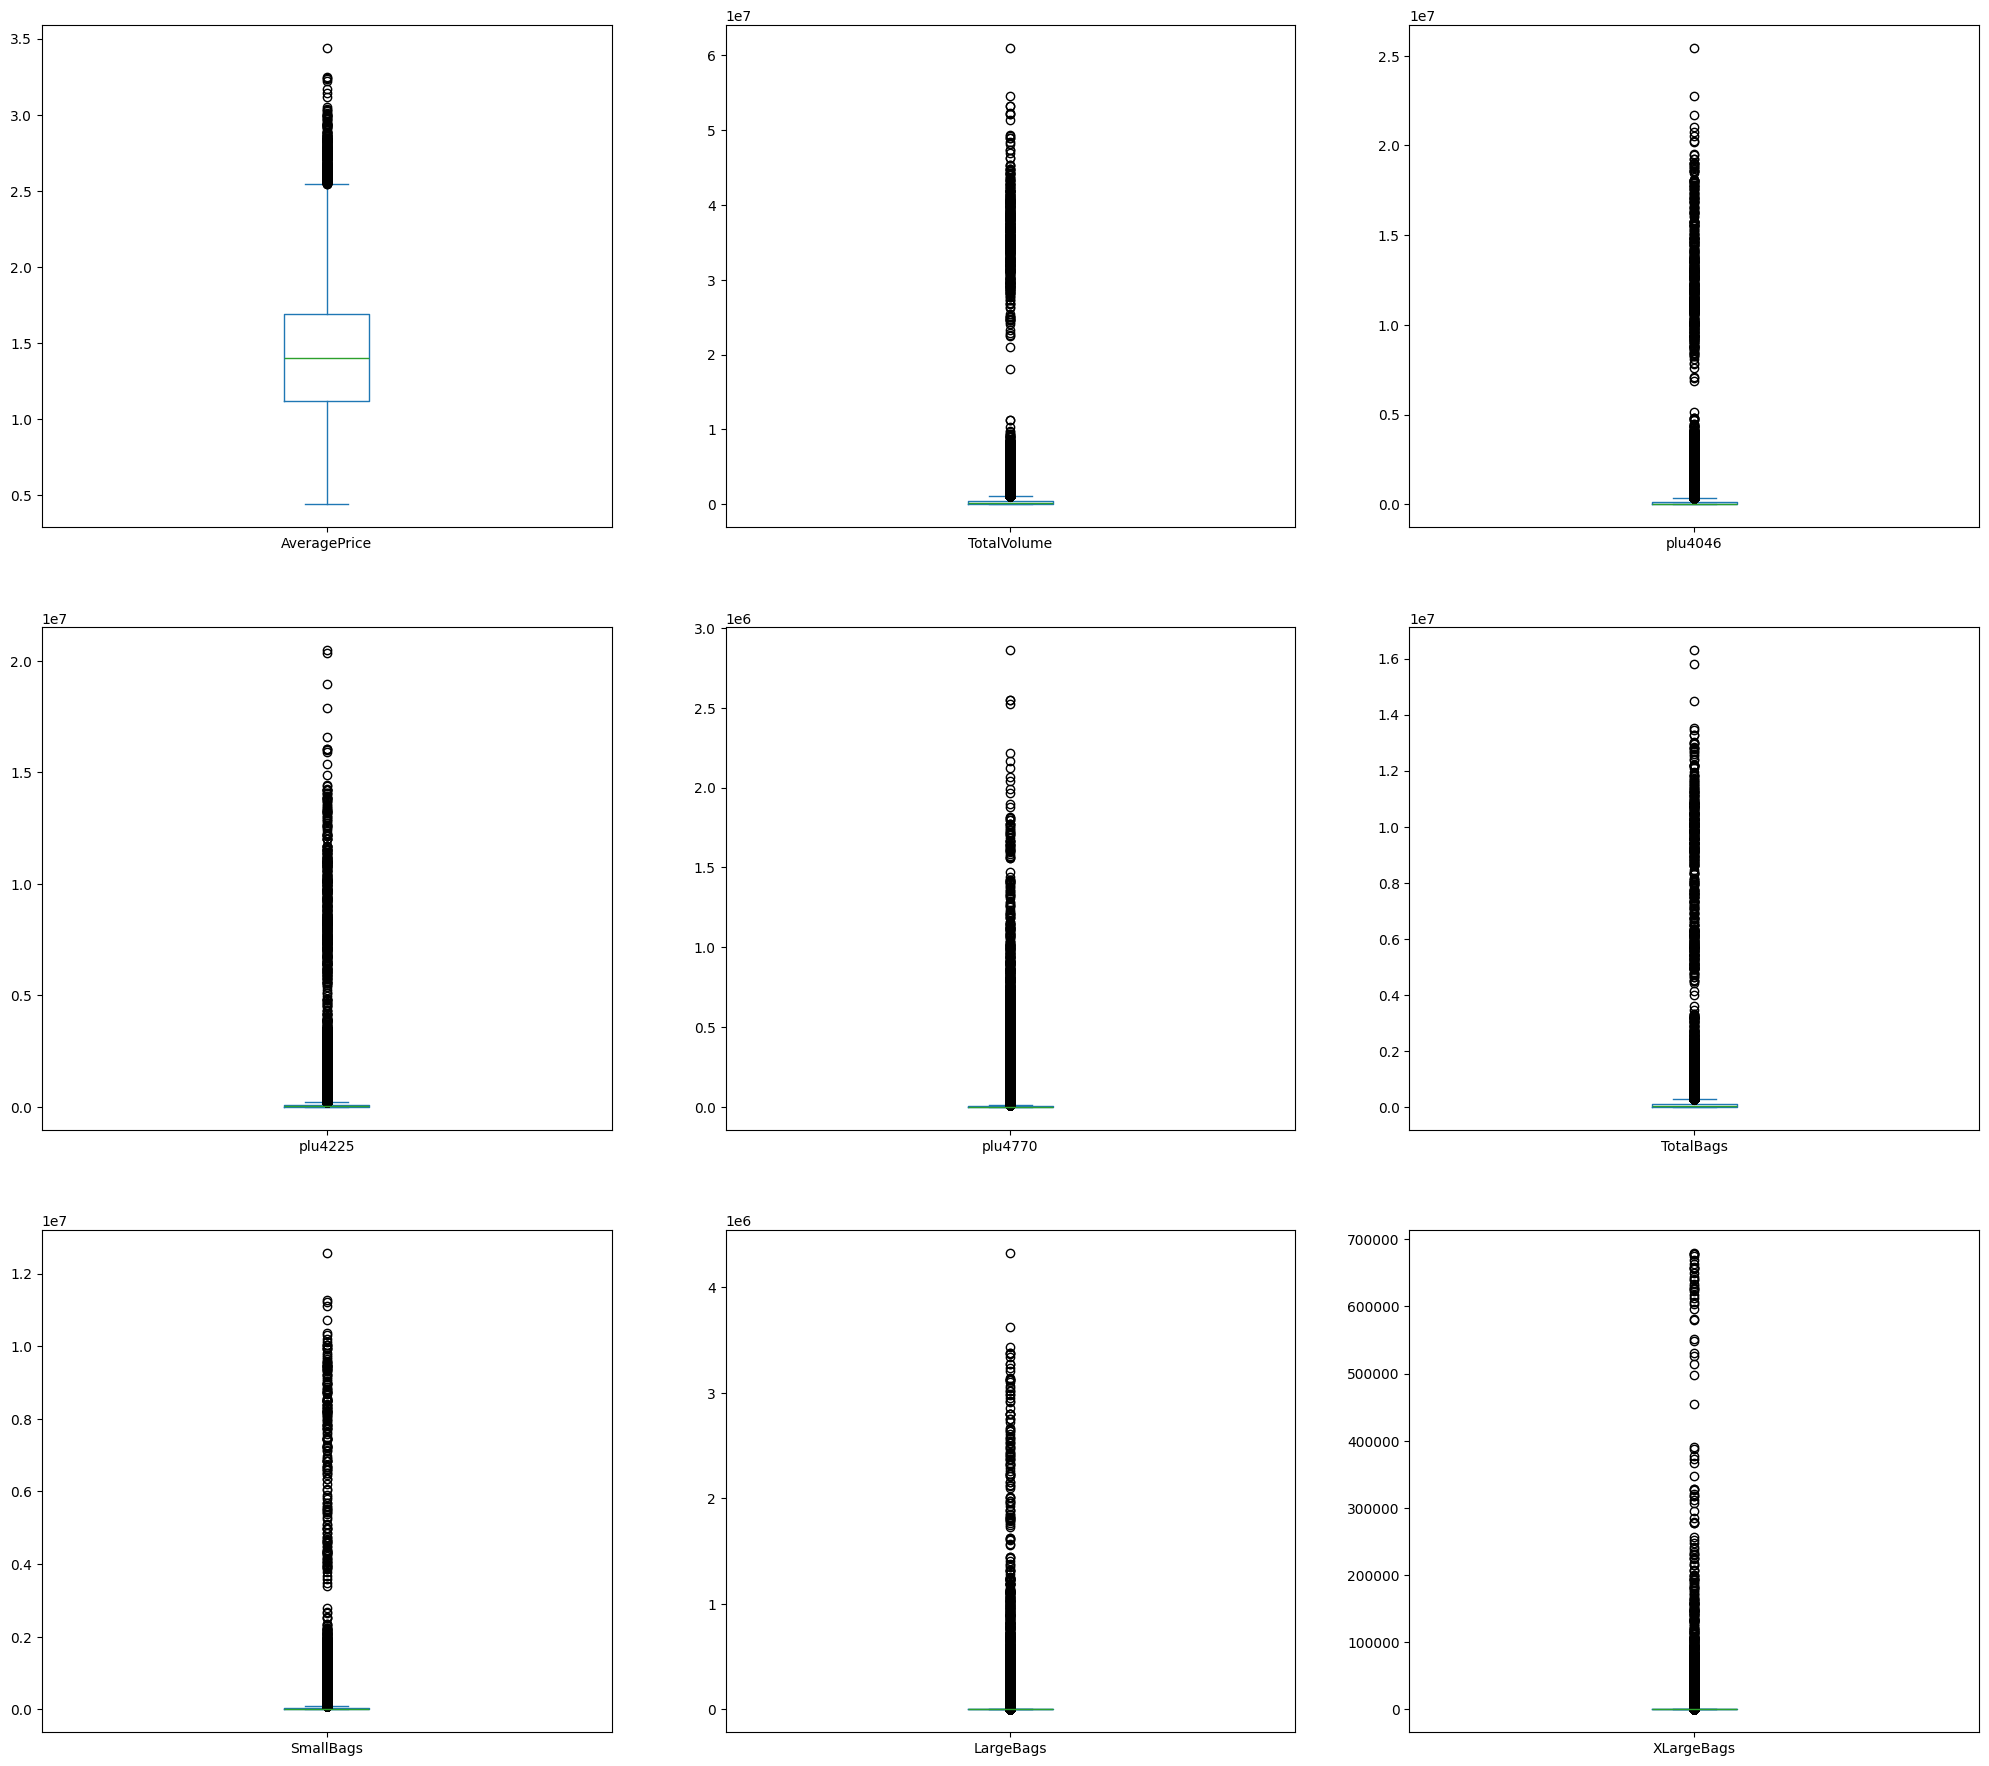

In [31]:
fig=plt.figure(figsize=(25,30))
ax=fig.gca()
df.plot(ax=ax,kind='box',subplots=True, layout=(4,3),sharex=False)
plt.show()

In [32]:
subset_df['Date'] = pd.to_datetime(subset_df['Date'])


In [33]:
columnas_deseadas = ['AveragePrice', 'TotalVolume', 'plu4046','plu4225','plu4770','TotalBags','SmallBags','LargeBags','XLargeBags']
df_nuevo = subset_df[columnas_deseadas].copy() 

In [34]:
columnas = ['AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
            'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']

# Reemplazar los valores faltantes de cada columna por su promedio
df_nuevo[columnas] = df_nuevo[columnas].fillna(df_nuevo[columnas].mean())

In [35]:
df_nuevo

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
18988,1.762750,20143.58,430.84,2436.25,0.00,7870.78,0.000000e+00,0.000000e+00,0.000000
41018,1.624900,1540492.33,65280.17,85003.19,212.79,940298.46,8.598977e+05,9.932500e+03,0.000000
4969,1.940000,858.83,13.84,84.18,0.00,760.81,7.556900e+02,5.120000e+00,0.000000
42183,1.118273,4981929.24,2527095.16,796196.77,60784.30,1596537.39,1.099150e+05,2.450130e+04,2682.866209
50529,1.679652,29881.25,224.87,2563.94,0.00,18010.47,1.099150e+05,2.450130e+04,2682.866209
...,...,...,...,...,...,...,...,...,...
27174,1.821814,7436.97,1519.75,10.08,0.00,5100.23,0.000000e+00,0.000000e+00,0.000000
10474,2.010000,8433.01,1281.15,5281.54,8.56,1861.76,1.804650e+03,5.711000e+01,0.000000
15759,1.580000,25031589.09,8769357.86,8534404.17,392119.12,7335707.94,5.387869e+06,1.893511e+06,54327.600000
7779,1.190000,837573.29,60638.26,540988.18,19544.87,216401.98,2.113062e+05,2.950730e+03,2145.000000


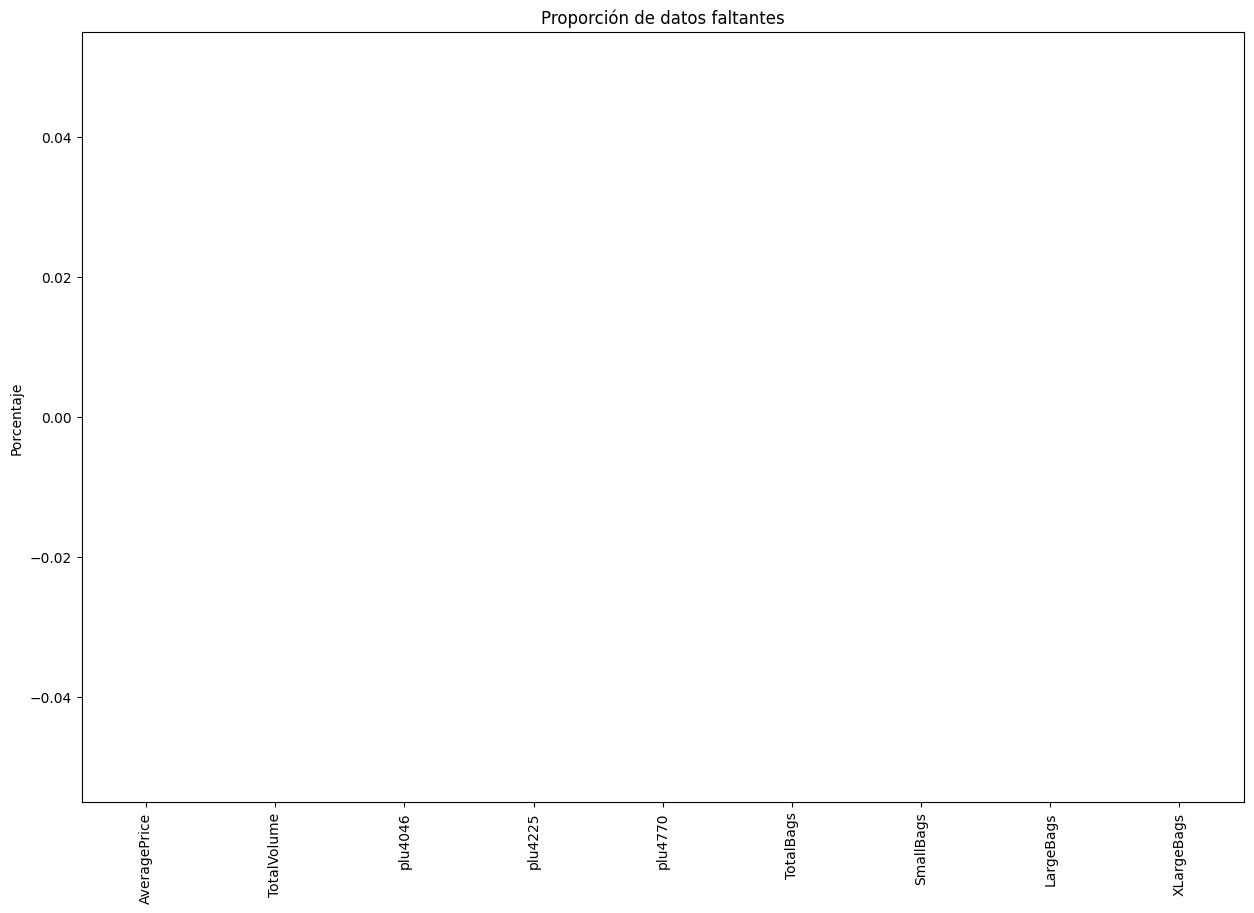

In [36]:

# Proporción de datos faltantes
faltantes = df_nuevo.isnull().mean() * 100

# Gráfico de datos faltantes
plt.figure(figsize=(15, 10))
faltantes.plot(kind='bar')
plt.title('Proporción de datos faltantes')
plt.ylabel('Porcentaje')
plt.show()

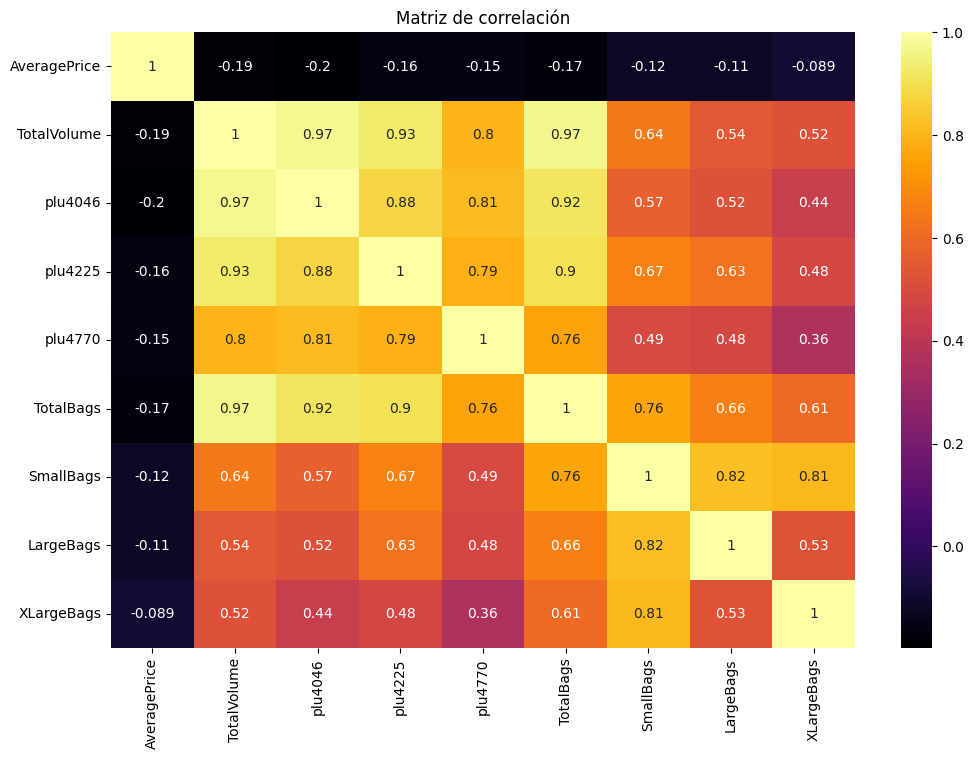

In [37]:
# Matriz de correlación
correlation_matrix = df_nuevo.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Matriz de correlación')
plt.show()

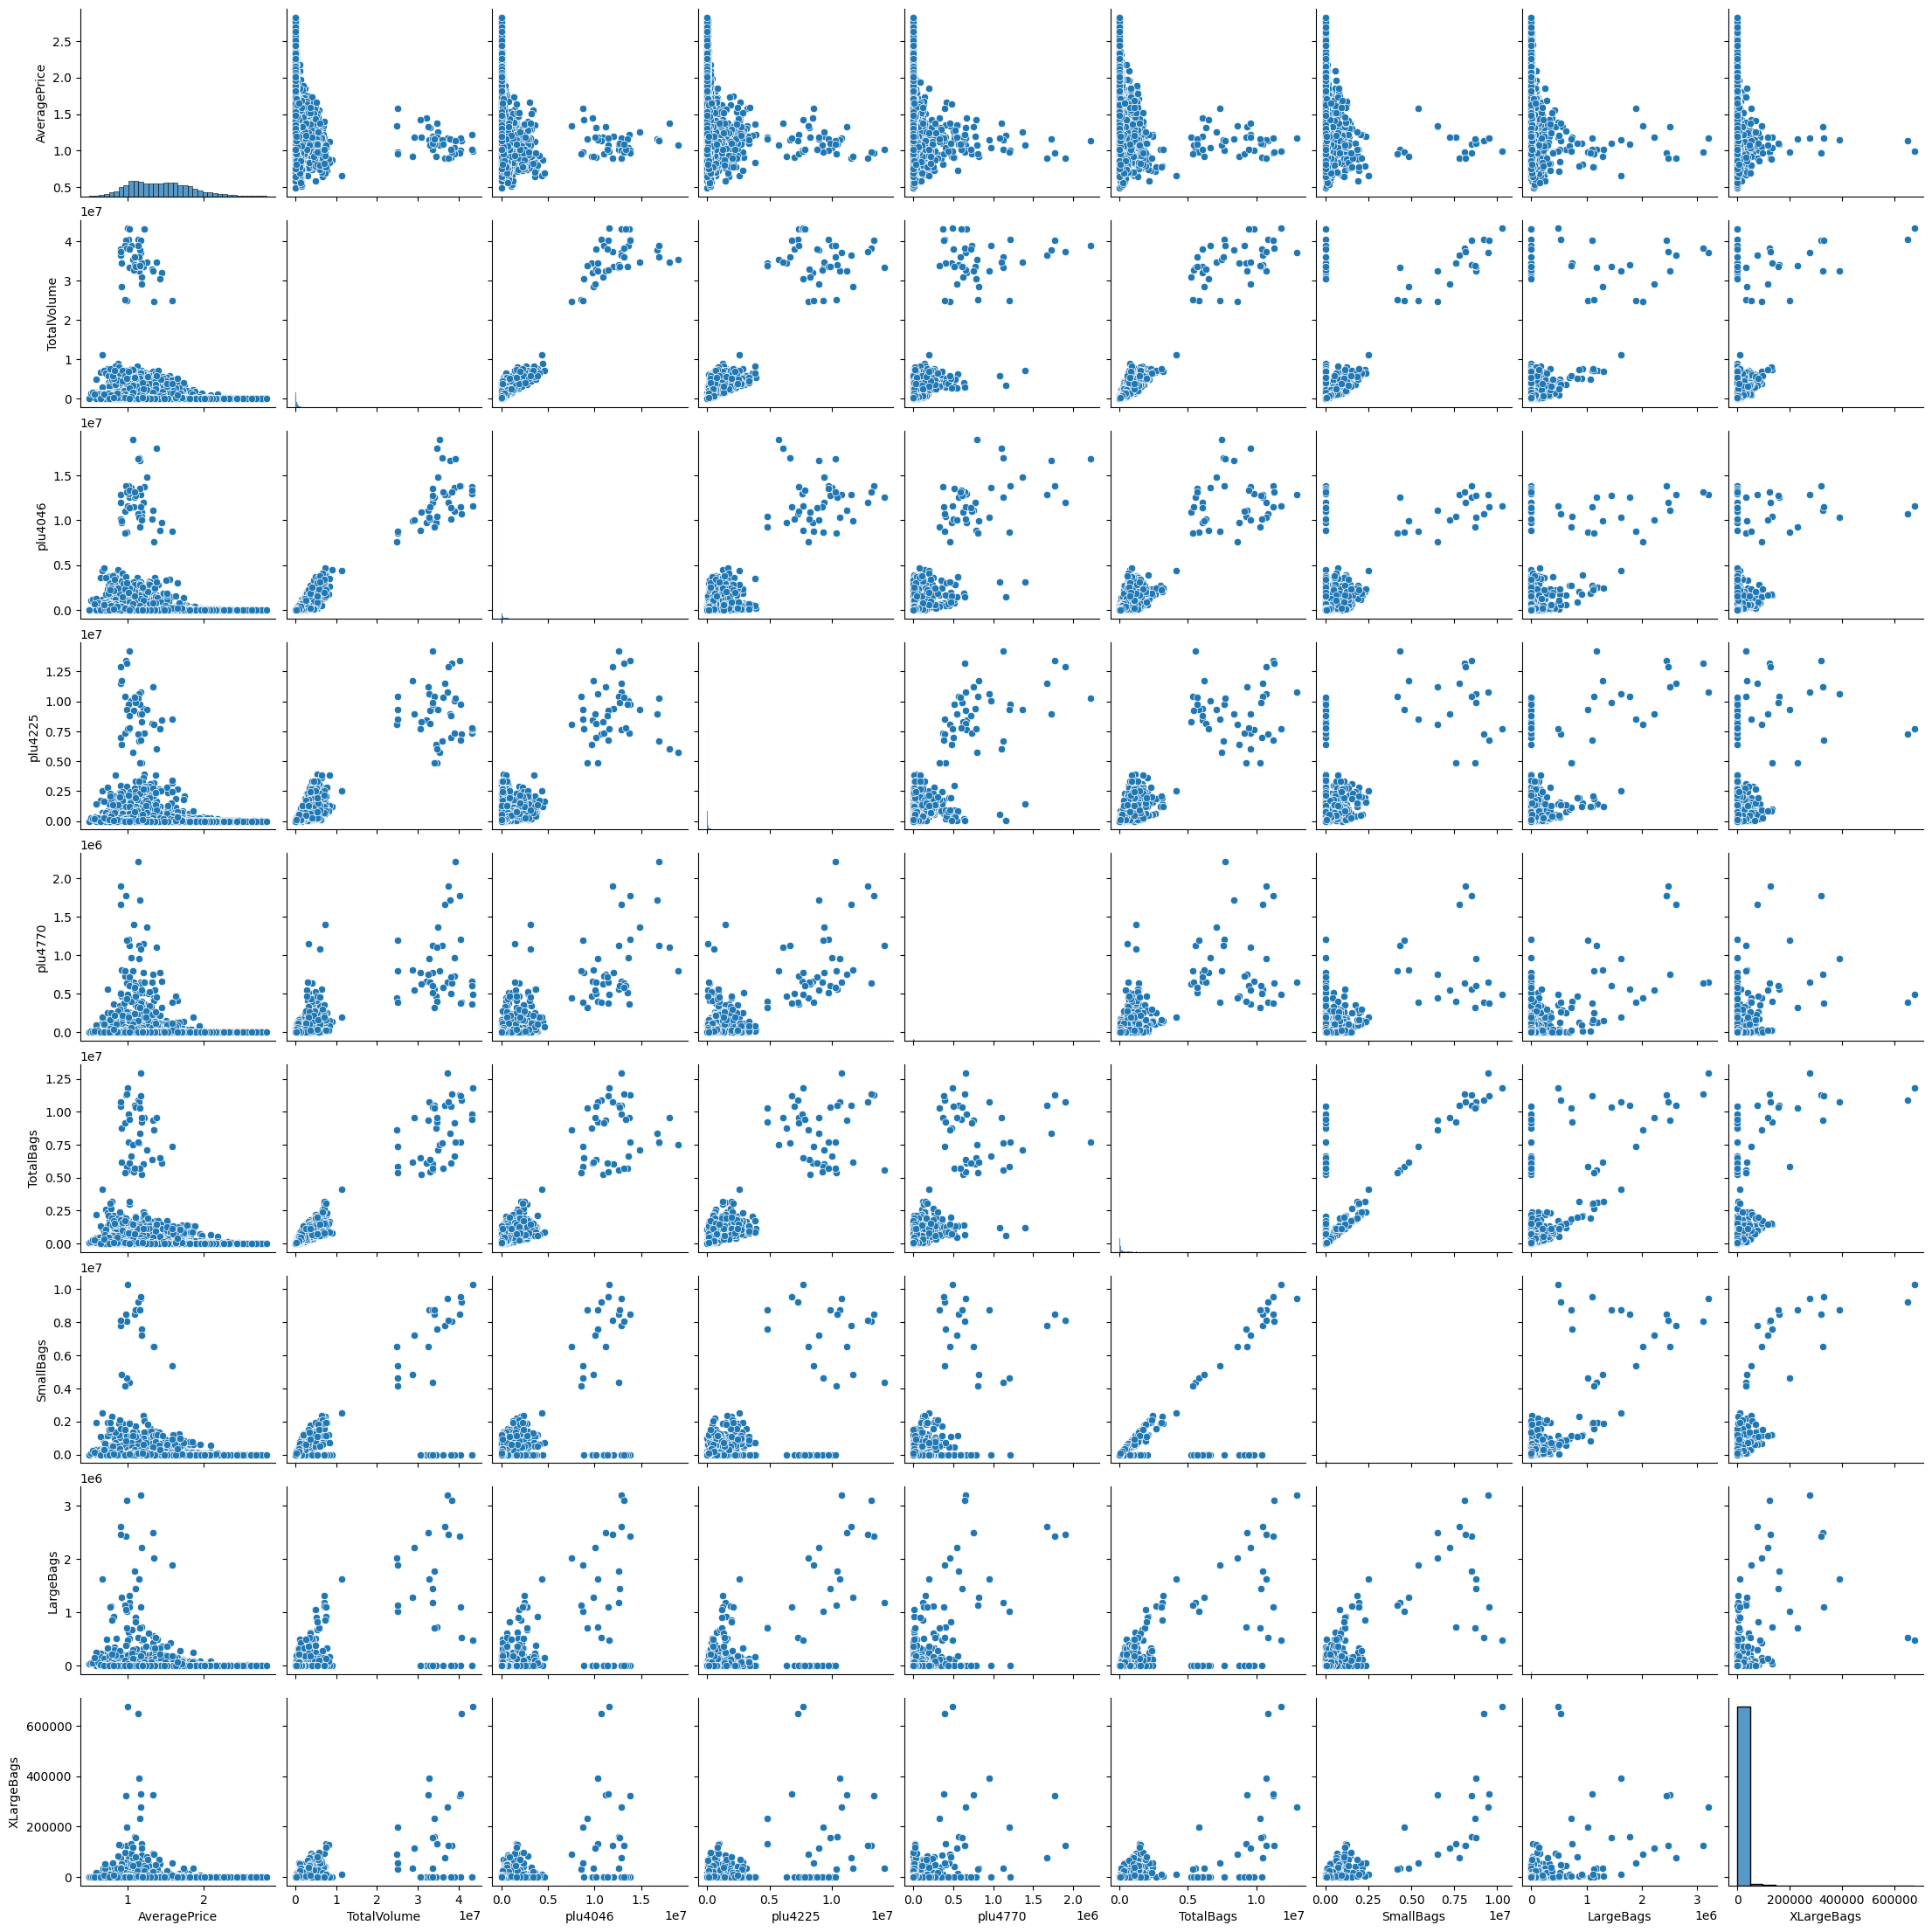

In [38]:
# Convertir la fecha a datetime si aún no lo hiciste
subset_df['Date'] = pd.to_datetime(subset_df['Date'])

# Seleccionar solo columnas numéricas para el pairplot
numeric_cols = subset_df.select_dtypes(include=['number'])

# Crear el pairplot
sns.pairplot(numeric_cols)
plt.show()

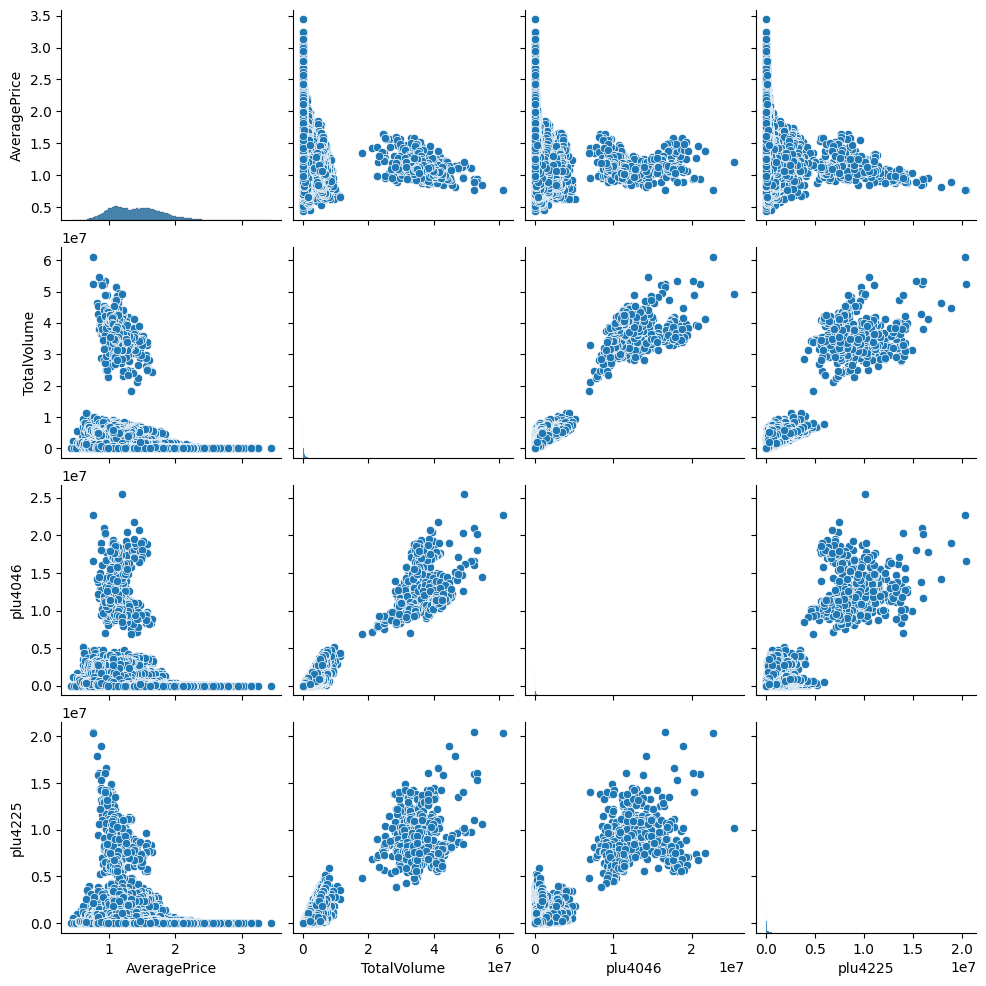

In [39]:
sns.pairplot(df, vars=['AveragePrice', 'TotalVolume', 'plu4046', 'plu4225'])
plt.show()

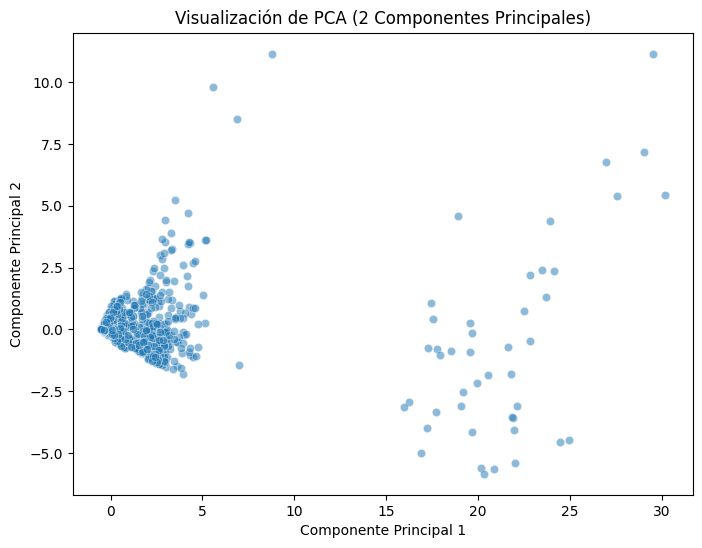

In [40]:

# ----------- APLICACIÓN DE PCA -----------
# Seleccionar variables numéricas para PCA
X_pca = df_nuevo[['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Aplicar PCA con dos componentes principales
pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_scaled)

# Convertir a DataFrame
df_pca = pd.DataFrame(X_pca_transformed, columns=['PC1', 'PC2'])

# Visualización del PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], alpha=0.5)
plt.title("Visualización de PCA (2 Componentes Principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [41]:
# Seleccionar variables predictoras y objetivo
X = df_nuevo[['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags']]
y = df_nuevo['AveragePrice']

In [42]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predicciones
y_pred = modelo.predict(X_test)


In [45]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print("\nEvaluación del modelo de Regresión Lineal:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


Evaluación del modelo de Regresión Lineal:
MAE: 0.323230980523935
MSE: 0.15455243140121255
R²: 0.03662540082040988


MAE (Error Absoluto Medio) = 0.323

En promedio, la predicción del precio del aguacate se desvía en 0.32 unidades del valor real.

Para precios en dólares, esto equivale a un error medio de aproximadamente 32 centavos, lo que puede ser significativo dependiendo del rango de precios.

MSE (Error Cuadrático Medio) = 0.154

Penaliza los errores grandes más que los pequeños. El valor es relativamente bajo, pero por sí solo no dice mucho sin contexto.

R² (Coeficiente de Determinación) = 0.0366

Indica que solo el 3.66% de la variabilidad en el precio promedio del aguacate es explicada por las variables predictoras.

Un R² tan bajo sugiere que el modelo lineal no captura bien las relaciones en los datos.

Falta de variables clave: Factores como la estacionalidad, la demanda y el contexto económico pueden influir en el precio, pero no están incluidos.

Relaciones no lineales: El precio podría depender de los volúmenes y otros factores de manera no lineal, lo que hace que un modelo lineal sea insuficiente.

Poca correlación entre variables predictoras y la variable objetivo: Como vimos en la matriz de correlación, la relación entre "AveragePrice" y las otras variables puede ser débil.

✔ Explorar modelos más complejos como árboles de decisión, Random Forest o modelos de redes neuronales.
✔ Agregar más variables como factores de mercado o indicadores económicos.
✔ Analizar la estacionalidad del precio del aguacate mediante series temporales.

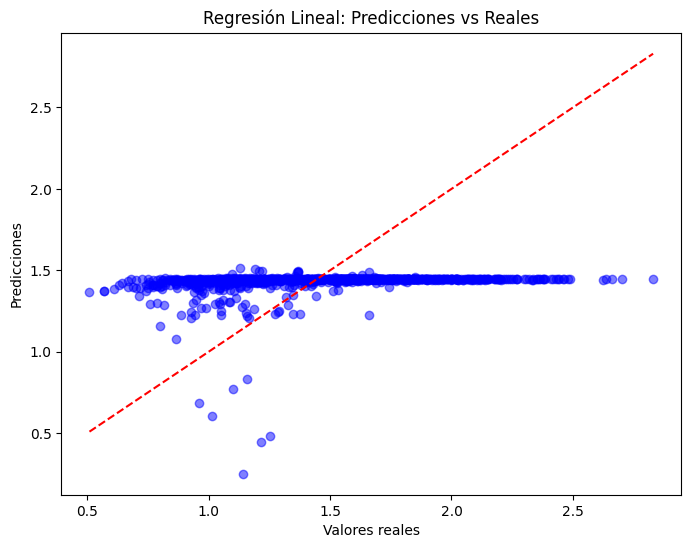

In [47]:
# Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Predicciones vs Reales")
plt.show()

comentarios importantes

# ----------- PROPUESTA DE SOLUCIÓN -----------
# Tipo de modelo sugerido: Regresión Lineal para predecir el precio promedio del aguacate
# Justificación: Debido a la naturaleza del problema, se requiere un modelo de regresión
# que relacione variables numéricas con la variable objetivo "AveragePrice".

# Reflexión final:
# - Se encontraron valores faltantes en el dataset, pero en cantidad mínima.
# - Se analizaron distribuciones de variables y correlaciones.
# - Se implementó un modelo de regresión lineal, obteniendo métricas de rendimiento.
# - Se aplicó PCA para reducir la dimensionalidad y visualizar los datos en 2D.
# - Se podrían explorar modelos más avanzados como Random Forest o redes neuronales para mejorar la precisión.